In [1]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
import os

In [2]:
#load data
os.chdir('../..')
df=pd.read_csv('./data/csv/phase2_data.csv')
#train logistic regression model with all numerical features
classif = setup(data = df, target = 'label', session_id=123, train_size=0.7,numeric_features=['ID','OD','IDW','ODW','LCC','AC','BC'],silent=True)

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(16503, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [3]:
#add balanced accuracy metric
add_metric('balanced_accuracy', 'Balanced Accuracy', balanced_accuracy_score, greater_is_better=True)

#Add specificity metric
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    return specificity
    
add_metric('specificity', 'Specificity', specificity_score, greater_is_better=True)



Name                                                    Specificity
Display Name                                            Specificity
Score Function       <function specificity_score at 0x7f92e746c550>
Scorer                               make_scorer(specificity_score)
Target                                                         pred
Args                                                             {}
Greater is Better                                              True
Multiclass                                                     True
Custom                                                         True
Name: specificity, dtype: object

In [4]:
#logistic regression without penalization
lr = create_model('lr',penalty='none',class_weight='balanced')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Balanced Accuracy,Specificity
Fold,,,,,,,,,
0,0.1514,0.9983,1.0000,0.0020,0.0041,0.0006,0.0175,0.5750,0.1499
1,0.1687,0.9931,1.0000,0.0021,0.0041,0.0007,0.0186,0.5836,0.1672
2,0.2130,0.9957,1.0000,0.0011,0.0022,0.0005,0.0153,0.6062,0.2123
3,0.1948,1.0000,1.0000,0.0011,0.0021,0.0004,0.0144,0.5971,0.1941
4,0.1957,0.9965,1.0000,0.0011,0.0021,0.0004,0.0145,0.5975,0.1950
5,0.1896,0.9974,1.0000,0.0011,0.0021,0.0004,0.0142,0.5945,0.1889
6,0.1835,0.1049,0.0000,0.0000,0.0000,-0.0017,-0.0619,0.0919,0.1837
7,0.1766,0.0477,0.0000,0.0000,0.0000,-0.0017,-0.0634,0.0884,0.1768
8,0.1983,0.0676,0.0000,0.0000,0.0000,-0.0017,-0.0590,0.0992,0.1984


In [5]:
lr_results=pull()
#gthe dataframe has a column called Recall and a row called Mean. I want the value in the cell
lr_recall=lr_results.loc['Mean','Specificity']
print(lr_recall)
lr_results

0.1845


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Balanced Accuracy,Specificity
Fold,,,,,,,,,
0,0.1514,0.9983,1.0000,0.0020,0.0041,0.0006,0.0175,0.5750,0.1499
1,0.1687,0.9931,1.0000,0.0021,0.0041,0.0007,0.0186,0.5836,0.1672
2,0.2130,0.9957,1.0000,0.0011,0.0022,0.0005,0.0153,0.6062,0.2123
3,0.1948,1.0000,1.0000,0.0011,0.0021,0.0004,0.0144,0.5971,0.1941
4,0.1957,0.9965,1.0000,0.0011,0.0021,0.0004,0.0145,0.5975,0.1950
5,0.1896,0.9974,1.0000,0.0011,0.0021,0.0004,0.0142,0.5945,0.1889
6,0.1835,0.1049,0.0000,0.0000,0.0000,-0.0017,-0.0619,0.0919,0.1837
7,0.1766,0.0477,0.0000,0.0000,0.0000,-0.0017,-0.0634,0.0884,0.1768
8,0.1983,0.0676,0.0000,0.0000,0.0000,-0.0017,-0.0590,0.0992,0.1984


In [6]:
#Save logistic regression average and stdev metrics
lr_results = pull()
#Keep Recall, Balanced Accuracy and specificity columns only
lr_results = lr_results[['Recall','Balanced Accuracy','Specificity']]
#Save dataframe rows called Mean and Std
lr_results = lr_results.loc[['Mean','Std']]
lr_results

,Recall,Balanced Accuracy,Specificity
Fold,,,
Mean,0.7000,0.4423,0.1845
Std,0.4583,0.2287,0.0167


In [7]:
max_features=[1,2,3,4,5,6]
max_depth=[1,2,3]
n_estimators=[10,50,100,500,1000]
#create dataframe for storing results
results=pd.DataFrame(columns=['max_features','max_depth','n_estimators','recall_mean','recall_stdev','specificity_mean','specificity_std','balanced_acc_mean','balanced_acc_std'])
for feat in max_features:
    for depth in max_depth:
        for est in n_estimators:
            rf=create_model('rf',max_features=feat,max_depth=depth,n_estimators=est,class_weight='balanced')
            #To train on unbalanced data use class_weight='balanced'
            rf_results=pull()
            rf_recall_mean=rf_results.loc['Mean','Recall']
            rf_recall_stdev=rf_results.loc['Std','Recall']
            rf_specificity_mean=rf_results.loc['Mean','Specificity']
            rf_specificity_stdev=rf_results.loc['Std','Specificity']
            rf_balanced_acc_mean=rf_results.loc['Mean','Balanced Accuracy']
            rf_balanced_acc_stdev=rf_results.loc['Std','Balanced Accuracy']           
            
            #store results
            results=results.append({'max_features':feat,'max_depth':depth,'n_estimators':est,'recall_mean':rf_recall_mean,'recall_stdev':rf_recall_stdev,'specificity_mean':rf_specificity_mean,'specificity_std':rf_specificity_stdev,'balanced_acc_mean':rf_balanced_acc_mean,'balanced_acc_std':rf_balanced_acc_stdev},ignore_index=True)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Balanced Accuracy,Specificity
Fold,,,,,,,,,
0,0.9706,0.9991,1.0000,0.0556,0.1053,0.1023,0.2322,0.9853,0.9705
1,0.9680,0.9948,1.0000,0.0513,0.0976,0.0946,0.2228,0.9840,0.9679
2,0.9792,0.4848,0.0000,0.0000,0.0000,-0.0017,-0.0042,0.4900,0.9801
3,0.9654,1.0000,1.0000,0.0244,0.0476,0.0460,0.1534,0.9827,0.9653
4,0.9654,0.9974,1.0000,0.0244,0.0476,0.0460,0.1534,0.9827,0.9653
5,0.9628,1.0000,1.0000,0.0227,0.0444,0.0428,0.1479,0.9814,0.9627
6,0.9688,0.9874,1.0000,0.0270,0.0526,0.0510,0.1618,0.9844,0.9688
7,0.9844,0.4749,0.0000,0.0000,0.0000,-0.0016,-0.0036,0.4926,0.9853
8,0.9706,0.9978,1.0000,0.0286,0.0556,0.0540,0.1665,0.9853,0.9705


In [8]:
results

,max_features,max_depth,n_estimators,recall_mean,recall_stdev,specificity_mean,specificity_std,balanced_acc_mean,balanced_acc_std
0,1.0,1.0,10.0,1.00,0.0000,0.8963,0.0153,0.9481,0.0077
1,1.0,1.0,50.0,0.90,0.3000,0.8963,0.0100,0.8981,0.1510
2,1.0,1.0,100.0,0.90,0.3000,0.8957,0.0105,0.8979,0.1511
3,1.0,1.0,500.0,0.90,0.3000,0.8959,0.0105,0.8980,0.1514
4,1.0,1.0,1000.0,0.90,0.3000,0.8959,0.0099,0.8980,0.1511
...,...,...,...,...,...,...,...,...,...
85,6.0,3.0,10.0,0.65,0.3905,0.9845,0.0100,0.8172,0.1924
86,6.0,3.0,50.0,0.75,0.4031,0.9776,0.0093,0.8638,0.1986
87,6.0,3.0,100.0,0.80,0.4000,0.9730,0.0069,0.8865,0.1972
88,6.0,3.0,500.0,0.80,0.4000,0.9720,0.0072,0.8860,0.1969


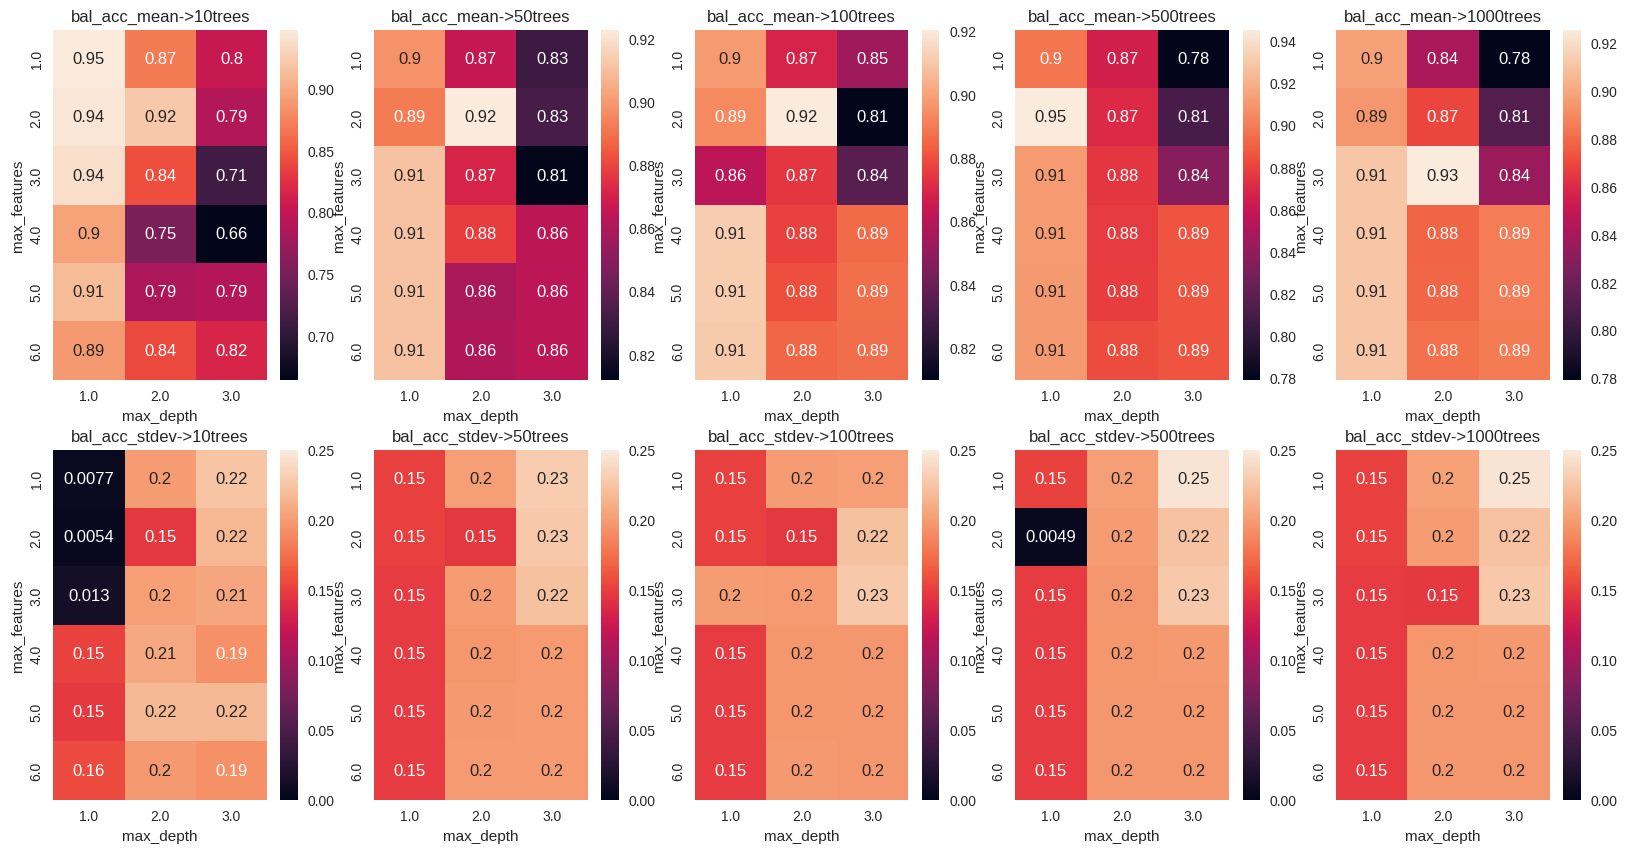

In [18]:
#A good way to visualize a 2 dimensional grid is to use a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

#Creat a 2x5 plot of heatmaps with balanced accuracy mean and stdev for each of the 5 n_estimator values
fig, axs = plt.subplots(2,5,figsize=(20,10))
for i in range(0,5):
    sns.heatmap(results[results['n_estimators']==n_estimators[i]].pivot(index='max_features',columns='max_depth',values='balanced_acc_mean'),ax=axs[0,i],annot=True)
    axs[0,i].set_title('bal_acc_mean->'+str(n_estimators[i])+'t rees')
    sns.heatmap(results[results['n_estimators']==n_estimators[i]].pivot(index='max_features',columns='max_depth',values='balanced_acc_std'),ax=axs[1,i],annot=True,vmin=0,vmax=0.25)
    axs[1,i].set_title('bal_acc_stdev->'+str(n_estimators[i])+' trees')
plt.show()
# #Create a pivot table with the results
# pivot=results.pivot(index='max_features',columns='max_depth',values='balanced_acc_mean')
# #Make 2x2 heatmaps plot
# fig, ax = plt.subplots(2,2,figsize=(10,10))

# #Plot the pivot table
# sns.heatmap(pivot,annot=True)
# plt.title('Balanced Accuracy,'+)
# plt.show()

In [ ]:
results.to_csv('./data/csv/rf_results.csv',index=False)